## Titanic Data Set Analysis

This is project no.1, a analysis of the famous Titanic Data Set. 
The data set can found here: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [63]:
'''Import statements'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [64]:
'''Data Load'''
df = pd.read_csv('./titanic.csv')
df.head(100)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
96,1,1,Mr. William Bertram Greenfield,male,23.0,0,1,63.3583
97,1,2,Mrs. John T (Ada Julia Bone) Doling,female,34.0,0,1,23.0000
98,0,2,Mr. Sinai Kantor,male,34.0,1,0,26.0000


In [65]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

Shape of the dataset

In [66]:
df.shape

(887, 8)

Check for null values

In [67]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

## Plots of the data

Class

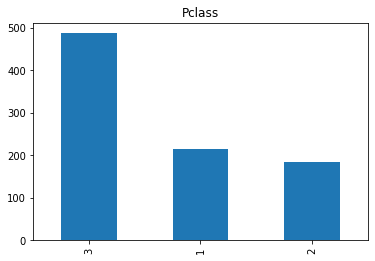

In [68]:

df_class = df.Pclass.value_counts()
(df_class).plot(kind="bar");
plt.title("Pclass");

Gender

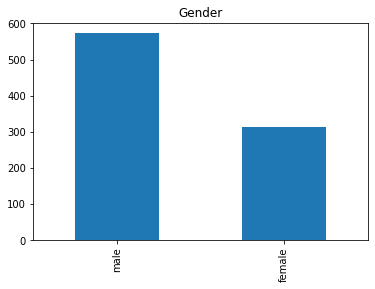

In [69]:
df_gender = df.Sex.value_counts()
(df_gender).plot(kind="bar");
plt.title("Gender");

Age

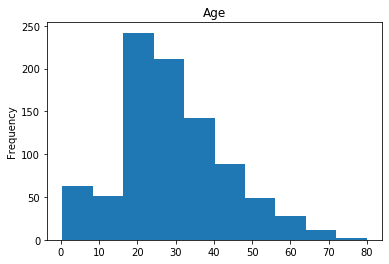

In [70]:
df_age = df.Age

df_age.plot.hist();
plt.title("Age");

Siblings/Spouses Aboard

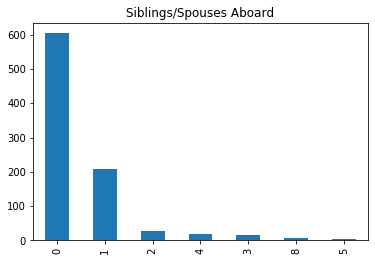

In [71]:
df_sib = df["Siblings/Spouses Aboard"].value_counts()
(df_sib).plot(kind="bar");
plt.title("Siblings/Spouses Aboard");

Parents/Children Aboard

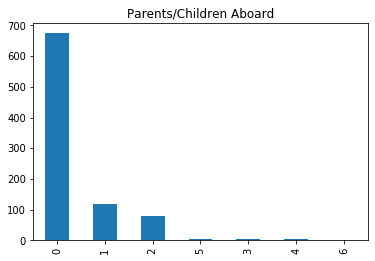

In [72]:
df_par = df["Parents/Children Aboard"].value_counts()
(df_par).plot(kind="bar");
plt.title("Parents/Children Aboard");

Fare

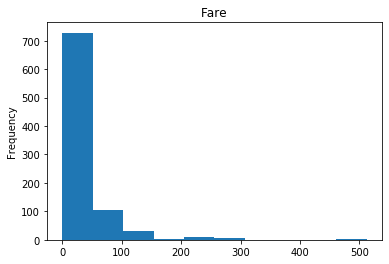

In [73]:
df_fare = df.Fare

df_fare.plot.hist();
plt.title("Fare");

Survived

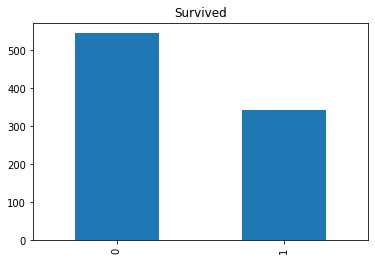

In [74]:
df_sur = df["Survived"].value_counts()
(df_sur).plot(kind="bar");
plt.title("Survived");

In [75]:
df_names_list = df.Name.str.split(" ", n = -1, expand = True)
df["Salutation"] = df_names_list[0]

In [76]:
df.head(100)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Salutation
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Mr.
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Mrs.
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Miss.
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Mrs.
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Mr.
...,...,...,...,...,...,...,...,...,...
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542,Mr.
96,1,1,Mr. William Bertram Greenfield,male,23.0,0,1,63.3583,Mr.
97,1,2,Mrs. John T (Ada Julia Bone) Doling,female,34.0,0,1,23.0000,Mrs.
98,0,2,Mr. Sinai Kantor,male,34.0,1,0,26.0000,Mr.


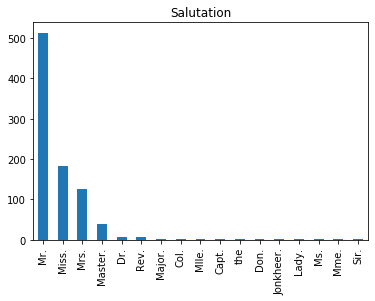

In [77]:
df_sur = df["Salutation"].value_counts()
(df_sur).plot(kind="bar");
plt.title("Salutation");

In [78]:
print(df_sur)

Mr.          513
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Capt.          1
the            1
Don.           1
Jonkheer.      1
Lady.          1
Ms.            1
Mme.           1
Sir.           1
Name: Salutation, dtype: int64


Cleaning Saluation

In [79]:
df['Salutation'] = df['Salutation'].replace(['Capt.','Mme.','Lady.','Sir.','Jonkheer.','Don.', 'the', 'Mlle.', 'Major.', 'Col.' ], 'Others')
df['Salutation'] = df['Salutation'].replace('Ms.', 'Miss.')

In [80]:
df_sur = df["Salutation"].value_counts()
print(df_sur)

Mr.        513
Miss.      183
Mrs.       125
Master.     40
Others      13
Dr.          7
Rev.         6
Name: Salutation, dtype: int64


## Analysis of Survivers

In [81]:
df.groupby(['Siblings/Spouses Aboard']).mean()['Survived'].sort_values()

Siblings/Spouses Aboard
5    0.000000
8    0.000000
4    0.166667
3    0.250000
0    0.347682
2    0.464286
1    0.535885
Name: Survived, dtype: float64

In [82]:
df.groupby(['Pclass']).mean()['Survived'].sort_values()

Pclass
3    0.244353
2    0.472826
1    0.629630
Name: Survived, dtype: float64

In [83]:
df.groupby(['Parents/Children Aboard']).mean()['Survived'].sort_values()

Parents/Children Aboard
4    0.000000
6    0.000000
5    0.200000
0    0.345697
2    0.500000
1    0.550847
3    0.600000
Name: Survived, dtype: float64

In [84]:
df.groupby(['Sex']).mean()['Survived'].sort_values()

Sex
male      0.190227
female    0.742038
Name: Survived, dtype: float64

In [85]:
df.groupby(['Salutation']).mean()['Survived'].sort_values()

Salutation
Rev.       0.000000
Mr.        0.157895
Dr.        0.428571
Master.    0.575000
Others     0.615385
Miss.      0.699454
Mrs.       0.792000
Name: Survived, dtype: float64

In [86]:
df.groupby(['Fare']).mean()['Survived'].sort_values()

Fare
8.7125      0.0
32.3208     0.0
11.5000     0.0
33.5000     0.0
34.0208     0.0
           ... 
32.5000     1.0
12.0000     1.0
12.2875     1.0
8.1125      1.0
512.3292    1.0
Name: Survived, Length: 248, dtype: float64

In [87]:
print("min Age: ", min(df.Fare))
print ("max Age: ", max(df.Fare))
print ("avg Age: ", df.Fare.mean())

min Age:  0.0
max Age:  512.3292
avg Age:  32.30542018038328


In [88]:
df.loc[(df.Fare < 25),  'FareGroup'] = '0 - 25'
df.loc[(df.Age < 50) & (df.Age >= 26),  'FareGroup'] = '26 - 50'
df.loc[(df.Age < 75) & (df.Age >= 51),  'FareGroup'] = '51 - 75'
df.loc[(df.Age < 100) & (df.Age >= 76),  'FareGroup'] = '76 - 100'
df.loc[(df.Age < 125) & (df.Age >= 101),  'FareGroup'] = '101 - 125'
df.loc[(df.Age < 150) & (df.Age >= 126),  'FareGroup'] = '126 - 150'
df.loc[(df.Age < 175) & (df.Age >= 151),  'FareGroup'] = '151 - 175'
df.loc[(df.Age >= 176),  'FareGroup'] = '> 176'

In [89]:
df.groupby(['FareGroup']).mean()['Survived'].sort_values()

FareGroup
51 - 75     0.295775
0 - 25      0.329630
26 - 50     0.398585
76 - 100    1.000000
Name: Survived, dtype: float64

In [90]:
df.groupby(['Age']).mean()['Survived'].sort_values()

Age
64.00    0.0
24.50    0.0
28.50    0.0
23.50    0.0
30.50    0.0
        ... 
0.83     1.0
0.75     1.0
0.67     1.0
63.00    1.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64

In [91]:
print("min Age: ", min(df.Age))
print ("max Age: ", max(df.Age))

min Age:  0.42
max Age:  80.0


In [92]:
df.loc[(df.Age < 11),  'AgeGroup'] = '0 - 10'
df.loc[(df.Age < 21) & (df.Age >= 11),  'AgeGroup'] = '11 - 20'
df.loc[(df.Age < 31) & (df.Age >= 21),  'AgeGroup'] = '21 - 30'
df.loc[(df.Age < 41) & (df.Age >= 31),  'AgeGroup'] = '31 - 40'
df.loc[(df.Age < 51) & (df.Age >= 41),  'AgeGroup'] = '41 - 50'
df.loc[(df.Age < 61) & (df.Age >= 51),  'AgeGroup'] = '51 - 60'
df.loc[(df.Age < 71) & (df.Age >= 61),  'AgeGroup'] = '61 - 70'
df.loc[(df.Age < 81) & (df.Age >= 71),  'AgeGroup'] = '71 - 80'

In [93]:
df.groupby(['AgeGroup']).mean()['Survived'].sort_values()

AgeGroup
61 - 70    0.181818
71 - 80    0.250000
21 - 30    0.342105
11 - 20    0.346667
51 - 60    0.369565
41 - 50    0.413462
31 - 40    0.434783
0 - 10     0.561644
Name: Survived, dtype: float64

Create Dummy Variables

In [94]:
#Pull a list of the column names of the categorical variables
#Function is take from course Nanodegree Data Science from Udacity


def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [95]:
cat_cols = ['Pclass', 'Sex', 'Salutation']

In [96]:
df = create_dummy_df(df, cat_cols, False)

Drop names

In [97]:
df = df.drop(["Name"], axis = 1)
df= df.drop(["FareGroup"], axis =1)
df= df.drop(["AgeGroup"], axis =1)

In [98]:
df.head(1000)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3,Sex_male,Salutation_Master.,Salutation_Miss.,Salutation_Mr.,Salutation_Mrs.,Salutation_Others,Salutation_Rev.
0,0,22.0,1,0,7.2500,0,1,1,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,27.0,0,0,13.0000,1,0,1,0,0,0,0,0,1
883,1,19.0,0,0,30.0000,0,0,0,0,1,0,0,0,0
884,0,7.0,1,2,23.4500,0,1,0,0,1,0,0,0,0
885,1,26.0,0,0,30.0000,0,0,1,0,0,1,0,0,0


In [99]:
print(df.corr())

                         Survived       Age  Siblings/Spouses Aboard  \
Survived                 1.000000 -0.059665                -0.037082   
Age                     -0.059665  1.000000                -0.297669   
Siblings/Spouses Aboard -0.037082 -0.297669                 1.000000   
Parents/Children Aboard  0.080097 -0.193741                 0.414244   
Fare                     0.256179  0.112329                 0.158839   
Pclass_2                 0.091715  0.014398                -0.057086   
Pclass_3                -0.320134 -0.334814                 0.094702   
Sex_male                -0.542152  0.091875                -0.113249   
Salutation_Master.       0.084577 -0.382306                 0.349309   
Salutation_Miss.         0.328792 -0.268908                 0.085440   
Salutation_Mr.          -0.547835  0.196475                -0.249202   
Salutation_Mrs.          0.338202  0.180689                 0.062597   
Salutation_Others        0.057585  0.119560                -0.03

In [100]:
y=df['Survived']
X=df.drop(['Survived'], axis = 1)

In [101]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [102]:
clf = svm.SVC()

In [103]:
clf.fit(X_train, y_train)

/Users/birgitjohannes/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
y_prediction_SVR=clf.predict(X_test)

In [105]:
confusion_matrix(y_test, y_prediction)

array([[133,  33],
       [ 38,  63]])

In [106]:

average_precision_SVR = average_precision_score(y_test, y_prediction_SVR)
print(average_precision_SVR)

0.5516661567842177


In [107]:
average_recall_SVR = recall_score(y_test, y_prediction_SVR)
print(average_recall_SVR)

0.6237623762376238


In [108]:
f1_score_SVR = f1_score(y_test, y_prediction_SVR)
print(f1_score_SVR)

0.6395939086294415


In [109]:
lm = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

In [110]:
lm.fit(X_train, y_train)

/Users/birgitjohannes/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_prediction_lin=lm.predict(X_test)

In [112]:
average_precision_lin = average_precision_score(y_test, y_prediction_lin)
print(average_precision_lin)

0.6102940631141766


In [113]:
average_recall_lin = recall_score(y_test, y_prediction_lin)
print(average_recall_lin)

0.6534653465346535


In [114]:
f1_score_lin = f1_score(y_test, y_prediction_lin)
print(f1_score_lin)

0.6910994764397905


In [115]:
confusion_matrix(y_test, y_prediction_lin)

array([[142,  24],
       [ 35,  66]])

In [116]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [117]:
clf.fit(X_train, y_train)

/Users/birgitjohannes/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [118]:
y_prediction_rforrest=clf.predict(X_test)

In [119]:
confusion_matrix(y_test, y_prediction_rforrest)

array([[142,  24],
       [ 43,  58]])

In [120]:
average_precision_rforrest = average_precision_score(y_test, y_prediction_rforrest)
print(average_precision_rforrest)

0.5672307707613732


In [123]:
average_recall_rforrest = recall_score(y_test, y_prediction_rforrest)
print(average_recall_rforrest)

0.5742574257425742


In [124]:
f1_score_rforrest = f1_score(y_test, y_rforrest_prediction)
print(f1_score_rforrest)

0.6338797814207651
